In [143]:

from __future__ import absolute_import, division, print_function
 
import sys
import os
 
import pandas as pd
import numpy as np
 
# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
 
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns


In [264]:
# 数据，包含两列，第一列为日期，第二列为得分
datafile="microwave_ARIMA_8month.csv"
ts_df = pd.read_csv(datafile, index_col=0, parse_dates=[0])
 
n_sample = ts_df.shape[0]
print(ts_df.shape)
print(ts_df.head())

(198, 1)
            total_score
date                   
2015-01-01         24.3
2015-01-02          3.7
2015-01-03          7.4
2015-01-05         14.2
2015-01-06          3.4


In [265]:
n_train=int(1*n_sample)+1
n_forecast=n_sample-n_train
#ts_df
ts_train = ts_df.iloc[:n_train]['total_score']
ts_test = ts_df.iloc[n_train:]['total_score']
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:", "\n", ts_train.tail(), "\n")
print("Testing Series:", "\n", ts_test.head())

(198,)
(0,)
Training Series: 
 date
2015-08-25     1.8
2015-08-27     6.4
2015-08-28     7.7
2015-08-29     5.5
2015-08-31    11.5
Name: total_score, dtype: float64 

Testing Series: 
 Series([], Name: total_score, dtype: float64)


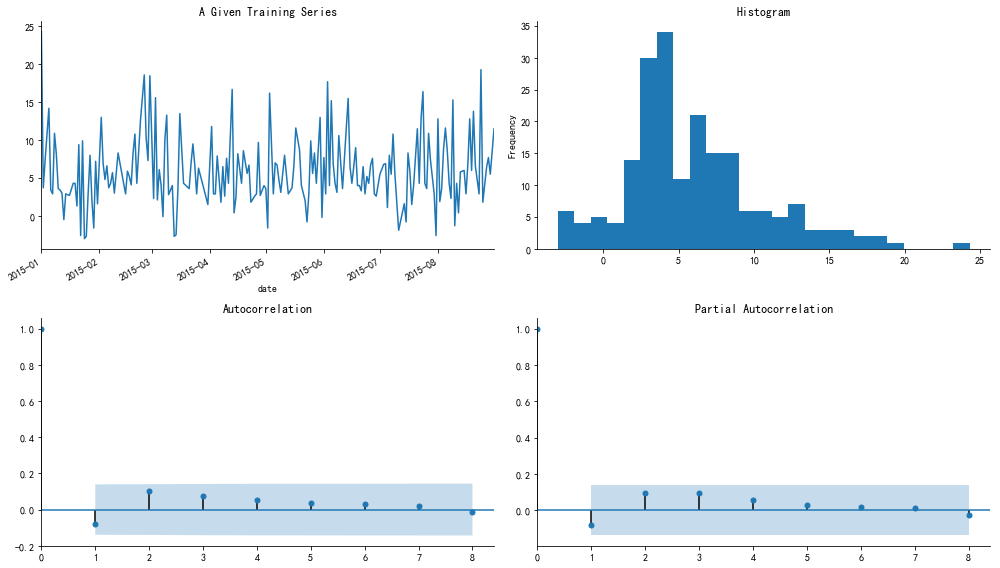

In [266]:

def tsplot(y, lags=None, title='', figsize=(14, 8)):
    
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax) # 折线图
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25) #直方图
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax) # ACF自相关系数
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax) # 偏自相关系数
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax
 
tsplot(ts_train, title='A Given Training Series', lags=8);

In [267]:
model = sm.tsa.ARIMA(ts_train, order=(4, 0, 0))
result = model.fit()
result.forecast(5)

d:\python3.6.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(array([ 5.622394  ,  6.64012954,  6.43458228,  6.29159434,  6.05205712]),
 array([ 4.60283672,  4.62299093,  4.65184096,  4.66786462,  4.67387232]),
 array([[ -3.3990002 ,  14.64378819],
        [ -2.42076618,  15.70102525],
        [ -2.68285848,  15.55202303],
        [ -2.8572522 ,  15.44044087],
        [ -3.1085643 ,  15.21267854]]))

In [253]:
# 预测每天的得分
y_prd = result.predict().values
y_prd

array([ 5.98714203,  4.39908476,  8.03684238,  7.42689312,  6.17791684,
        7.09622613,  6.9451895 ,  5.40932538,  5.82791874,  6.76419912,
        6.48458151,  5.87160832,  5.87868646,  5.14437537,  5.1277234 ,
        5.1102806 ,  5.45054718,  5.88681173,  4.90908338,  6.55991567,
        4.81719897,  6.5358474 ,  5.78419593,  4.65535822,  4.06763577,
        5.74952322,  6.33330145,  4.79807588,  5.50996548,  4.56609917,
        6.24077796,  6.67156716,  6.30474221,  6.19365899,  5.90388731,
        5.63615252,  5.93005122,  5.33413343,  6.1882501 ,  5.74482256,
        5.86307841,  5.89594202,  5.48792696,  5.53404036,  6.77640246,
        6.22063501,  5.70896935,  5.65549918,  7.72791842,  8.01080358,
        6.1249105 ,  8.01354465,  6.08372797,  7.68196653,  6.36358211,
        6.33226078,  6.13995952,  4.77997964,  4.96941867,  7.11177261,
        6.83557571,  6.68315833,  5.49204926,  4.31216432,  3.65261757,
        6.18726143,  6.68160823,  5.91013765,  5.40697717,  6.24

In [254]:
# 每天的真实得分
y = ts_df["total_score"].values
print(len(y))
y

8


array([  6.6,   2.9,  19.3,   1.8,   6.4,   7.7,   5.5,  11.5])

In [255]:
x = np.arange(8)
x_new = np.arange(8,13)
# 预测后8天的数据
y_new = result.forecast(13)[0]
x_new, y_new

(array([192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
        205, 206, 207, 208, 209, 210, 211]),
 array([ 5.62239498,  6.64013012,  6.43458352,  6.29159576,  6.05205829,
         6.09673845,  6.04102804,  6.01770372,  6.00501039,  6.00054537,
         5.99401773,  5.9915041 ,  5.98986882,  5.98882494,  5.98811639,
         5.98775982,  5.9875171 ,  5.9873691 ,  5.98727996,  5.9872272 ]))

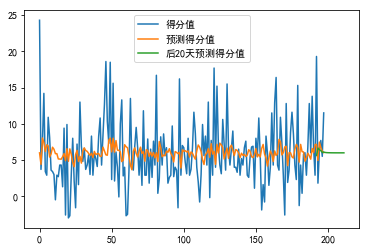

In [245]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

plt.plot(x,y)
plt.plot(x,y_prd)
plt.plot(x_new, y_new)
plt.legend(["得分值","预测得分值","后20天预测得分值"])

In [48]:
# Fit the model
arima200 = sm.tsa.SARIMAX(ts_train, order=(2,0,0), enforce_stationarity=False) # ARIMA季节性模型，至于p，d，q需要按照下面的方法选择
model_results = arima200.fit()

d:\python3.6.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


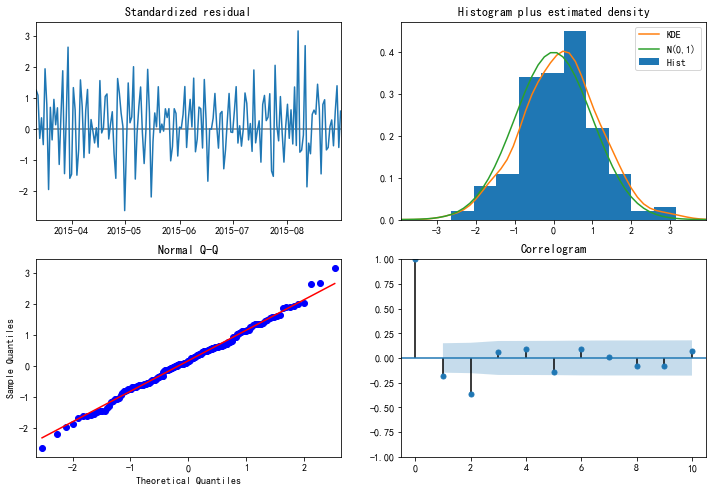

In [49]:
model_results.plot_diagnostics(figsize=(12, 8));